In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Logistic Regression

In [2]:
df = pd.read_csv('imbd_log.csv')

In [3]:
df.head()

,originalTitle,rating,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,criticReviewsTotal,...,genres,castNumber,companiesNumber,averageRating,regions,externalLinks,writerCredits,directorsCredits,soundMixes,quotesTotal
0,Carmencita,"(5, 6]",1894,1.0,0.000000,7.644919,1.098612,0.0,4,1.386294,...,"Documentary,Short",0.693147,1.386294,5.7,"['\\N', 'DE', 'US', 'HU', 'GR', 'RU', 'UA', 'JP']",2.302585,0.0,0.693147,['silent'],0.0
1,Un bon bock,"(5, 6]",1892,12.0,0.000000,5.214936,1.098612,0.0,2,0.000000,...,"Animation,Short",0.000000,0.000000,5.4,"['\\N', 'HU', 'DE', 'FR', 'RO', 'RU', 'JP']",1.386294,0.0,0.693147,['silent'],0.0
2,Chinese Opium Den,"(4, 5]",1894,1.0,0.000000,5.278115,0.693147,0.0,1,0.000000,...,Short,0.000000,0.693147,5.0,"['\\N', 'US', 'DE', 'PT', 'HU', 'RU']",1.609438,0.0,0.693147,['silent'],0.0
3,Edison Kinetoscopic Record of a Sneeze,"(5, 6]",1894,1.0,0.693147,7.713338,1.386294,0.0,4,1.098612,...,"Documentary,Short",0.693147,1.945910,5.4,"['\\N', 'UA', 'JP', 'HU', 'US', 'DE', 'RU']",1.945910,0.0,0.693147,['silent'],0.0
4,L'arrivée d'un train à La Ciotat,"(7, 8]",1896,1.0,0.000000,9.481588,2.564949,0.0,11,2.833213,...,"Documentary,Short",1.945910,1.791759,7.4,"['\\N', 'HU', 'DE', 'TR', 'FI', 'FR', 'IT', 'E...",3.091042,0.0,1.098612,['silent'],0.0


In [4]:
#averageRating tolto perché grazie al cazzo che è facile predire la classe del rating se hai il rating
numeric_df = df.select_dtypes(include=['number'])
numeric_df.head()

,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,criticReviewsTotal,AwNmExWins,canHaveEpisodes,isAdult,numRegions,userReviewsTotal,castNumber,companiesNumber,averageRating,externalLinks,writerCredits,directorsCredits,quotesTotal
0,1894,1.0,0.000000,7.644919,1.098612,0.0,4,1.386294,0.0,0,0,7,2.833213,0.693147,1.386294,5.7,2.302585,0.0,0.693147,0.0
1,1892,12.0,0.000000,5.214936,1.098612,0.0,2,0.000000,0.0,0,0,6,0.693147,0.000000,0.000000,5.4,1.386294,0.0,0.693147,0.0
2,1894,1.0,0.000000,5.278115,0.693147,0.0,1,0.000000,0.0,0,0,5,0.000000,0.000000,0.693147,5.0,1.609438,0.0,0.693147,0.0
3,1894,1.0,0.693147,7.713338,1.386294,0.0,4,1.098612,0.0,0,0,6,3.044522,0.693147,1.945910,5.4,1.945910,0.0,0.693147,0.0
4,1896,1.0,0.000000,9.481588,2.564949,0.0,11,2.833213,0.0,0,0,21,4.204693,1.945910,1.791759,7.4,3.091042,0.0,1.098612,0.0


In [5]:
x = numeric_df.values
y = df['titleType']

# Data Partitioning

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=100)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scl = StandardScaler()
x_train = scl.fit_transform(x_train)
x_test = scl.transform(x_test)

# Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
cv = StratifiedKFold()

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty' : ['l2', 'l1', None]}
clf = LogisticRegression(random_state=0, max_iter=1000, solver='saga')
grid_search = GridSearchCV(clf,
    param_grid, 
    cv=StratifiedKFold(),
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

c:\Users\tomma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tomma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tomma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\tomma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(max_iter=1000, random_state=0,
                                          solver='saga'),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l2', 'l1', 'None']},
             scoring='accuracy')

In [12]:
best_model = grid_search.best_estimator_

In [17]:
best_model.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1, max_iter=1000, penalty='l1', random_state=0,
                   solver='saga')>

In [13]:
y_pred = best_model.predict(x_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7957423094070442
F1-score [0.81627642 0.65077292 0.87025399 0.10922787 0.0317965  0.92016102
 0.         0.0280112  0.41681416 0.44038929]


c:\Users\tomma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tomma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       movie       0.80      0.84      0.82     11130
       short       0.70      0.61      0.65      4913
   tvEpisode       0.81      0.94      0.87     21249
tvMiniSeries       0.64      0.06      0.11       486
     tvMovie       0.43      0.02      0.03      1817
    tvSeries       0.86      0.99      0.92      2761
     tvShort       0.00      0.00      0.00        81
   tvSpecial       0.42      0.01      0.03       345
       video       0.66      0.30      0.42      1545
   videoGame       0.63      0.34      0.44       533

    accuracy                           0.80     44860
   macro avg       0.59      0.41      0.43     44860
weighted avg       0.77      0.80      0.76     44860



c:\Users\tomma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Classification report titleType (non raggruppati). Risultato della gridsearch: (C=1, max_iter=1000, penalty='l1', random_state=0, solver='saga').  
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],  
              'penalty' : ['l2', 'l1', None]}  

                precision    recall  f1-score   support

       movie       0.80      0.84      0.82     11130  
       short       0.70      0.61      0.65      4913  
    tvEpisode       0.81      0.94      0.87     21249
    tvMiniSeries       0.64      0.06      0.11       486  
     tvMovie       0.43      0.02      0.03      1817  
    tvSeries       0.86      0.99      0.92      2761  
     tvShort       0.00      0.00      0.00        81  
     tvSpecial       0.42      0.01      0.03       345  
       video       0.66      0.30      0.42      1545  
     videoGame       0.63      0.34      0.44       533  
  
    accuracy                           0.80     44860  
     macro avg       0.59      0.41      0.43     44860  
    weighted avg       0.77      0.80      0.76     44860  

In [14]:
best_model.intercept_

array([ 2.90679093,  1.70282968,  3.37650211, -2.97654145,  2.12576811,
       -3.16182326, -1.59433059,  0.28795152,  1.43812951, -4.10527654])

In [15]:
best_model.coef_

array([[-5.09187235e-01,  1.77722131e+00,  4.31615007e-01,
        -2.63068458e-01,  7.57078832e-02,  3.23782589e-01,
        -4.04757701e-01,  3.45339880e-01,  2.71285733e-01,
        -2.02364595e+00,  2.01539888e-01,  7.36508358e-01,
        -7.68041556e-02,  2.08473797e-01, -3.92831077e-01,
        -4.36163447e-01,  2.42788500e-01,  2.57686623e-02,
         5.02250149e-01, -3.74363864e-01],
       [-4.53870985e-01, -1.12406274e+00,  6.36666645e-01,
        -3.42119011e-01,  4.20606864e-02,  2.37336543e-01,
        -2.63293137e+00, -1.22125934e-02,  4.65235334e-01,
        -7.16093393e-01, -5.54594050e-02,  1.39817261e-01,
         4.91561233e-01, -4.84193254e-01, -1.67356451e-01,
        -4.19834512e-02,  4.15706490e-01,  1.73754232e-01,
         5.61655008e-01, -2.14720559e-01],
       [ 2.21122728e-01, -9.57247522e-02, -1.66789679e+00,
        -5.29276554e-02, -3.02624038e-01, -1.76887680e-01,
         1.65578856e+00,  1.25351413e-01, -1.94283339e+00,
        -1.62840226e+00, -1.8

In [21]:
# Return probability estimates for the test data X.
y_test_pred_proba = best_model.predict_proba(x_test)
y_test_pred_proba[0:10]

array([[4.31902684e-01, 4.79690308e-05, 1.51667346e-03, 2.23226432e-05,
        2.16275353e-03, 2.91521317e-06, 5.23776279e-07, 2.48861338e-05,
        5.64319272e-01, 1.58855013e-10],
       [5.47077658e-02, 4.42806421e-01, 4.08406302e-01, 2.69832400e-05,
        3.05331394e-02, 4.48949394e-05, 5.39664520e-03, 6.06123186e-03,
        4.46425650e-02, 7.37405192e-03],
       [2.04494630e-03, 2.87602917e-03, 9.77043710e-01, 2.61073546e-06,
        3.02351708e-03, 7.35150132e-07, 2.57018495e-03, 5.58015936e-04,
        1.28922231e-03, 1.05910279e-02],
       [8.76215871e-01, 1.40012027e-02, 2.73237749e-04, 6.09578717e-05,
        8.86355136e-02, 1.34657383e-05, 6.67598829e-05, 2.99651440e-03,
        1.77364590e-02, 1.85907608e-08],
       [8.18692114e-03, 3.87293421e-02, 9.23502249e-01, 1.81091016e-05,
        4.44740705e-03, 7.47722241e-06, 2.23999820e-03, 7.34548724e-04,
        2.44326592e-03, 1.96906818e-02],
       [6.25650105e-02, 2.91818517e-01, 5.94380761e-01, 9.44402522e-05,
   

In [22]:
# Ora, visto che le label sono più di 2, possiamo solo fare una ROC curve per ogni label vs the rest, con il metodo one-vs-the rest

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize


In [23]:
# Classi uniche nel dataset
classes = np.unique(y_test)

# Binarizza y_val
y_test_binarized = label_binarize(y_test, classes=classes)

y_test_binarized


array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

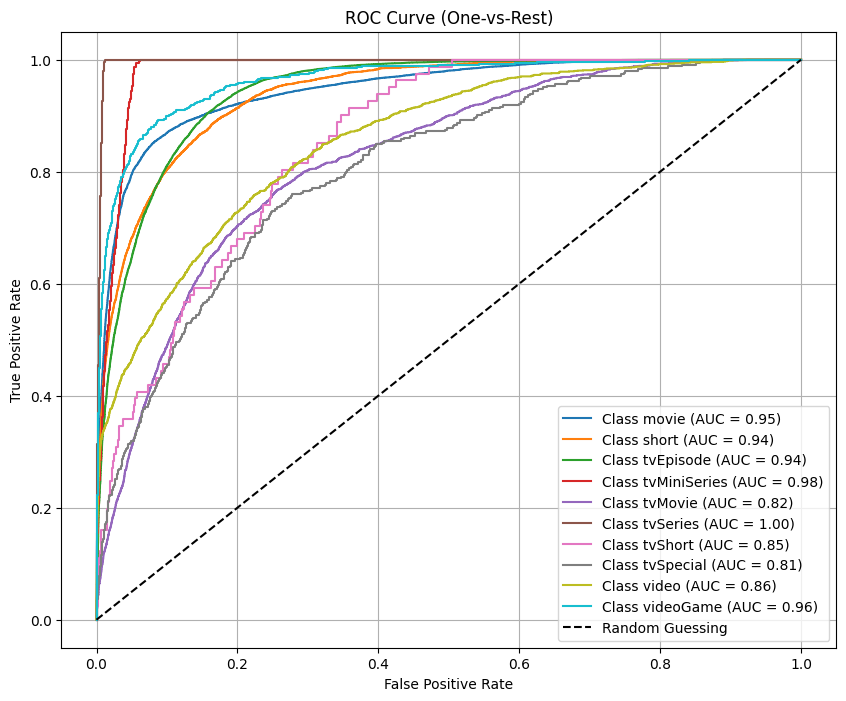

In [24]:
plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    # ROC curve per la classe i
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_test_pred_proba[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_test_pred_proba[:, i])
    
    # Traccia la curva ROC
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc:.2f})")

# Linea casuale per riferimento
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")

# Personalizza il grafico
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (One-vs-Rest)")
plt.legend(loc="best")
plt.grid()
plt.show()


In [25]:
# AUC (AREA UNDER THE CURVE, Ti dice quanto bene il modello riesce a distinguere tra le classi.) 
# media di tutte le classi (le singole sono gia nel grafico)
roc_auc_score(y_test_binarized, y_test_pred_proba, multi_class="ovr", average="macro")

np.float64(0.9110198815260719)

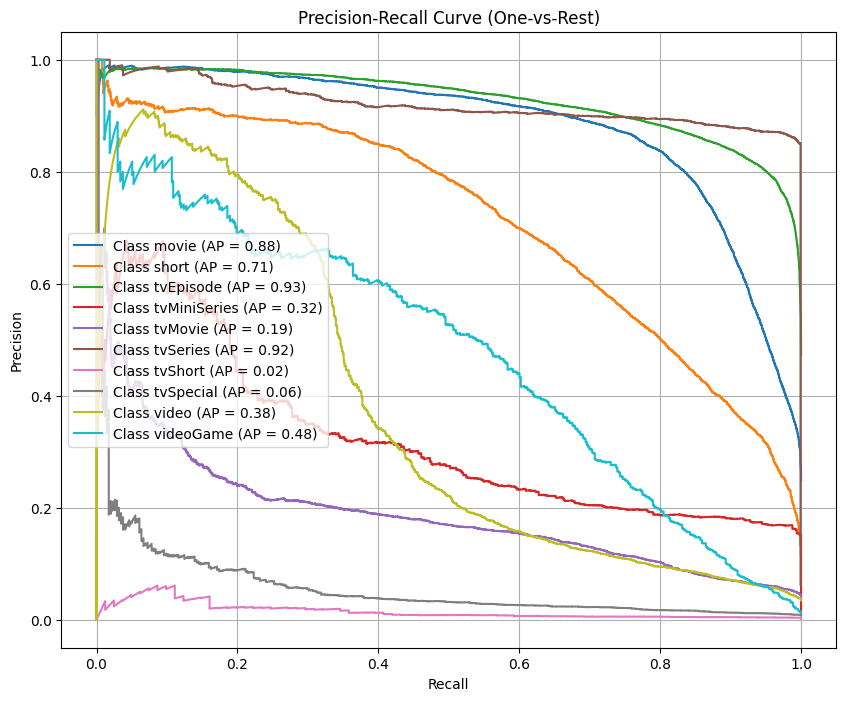

In [26]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    # Precision-Recall curve per la classe i
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_test_pred_proba[:, i])
    ap = average_precision_score(y_test_binarized[:, i], y_test_pred_proba[:, i])
    
    # Traccia la curva Precision-Recall
    plt.plot(recall, precision, label=f"Class {class_label} (AP = {ap:.2f})")

# Personalizza il grafico
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (One-vs-Rest)")
plt.legend(loc="best")
plt.grid()
plt.show()